# TREE CLASSIFIER

***DATA SOURCE***: https://archive.ics.uci.edu/dataset/222/bank+marketing

**IMPORTING REQUIRED LIBRARIES**

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

**DATA LOADING/EXTRACTION**


**READING THE DATA**

In [ ]:
# Load the dataset
data = pd.read_csv("/content/bank-additional-full.csv",delimiter=";")
data.rename(columns={'y':'deposit'},inplace=True)

**OVERVIEW OF THE DATASET**

In [ ]:
print(data.head())  # Display the first few rows of the DataFrame



   age        job  marital    education  default housing loan    contact  \
0   56  housemaid  married     basic.4y       no      no   no  telephone   
1   57   services  married  high.school  unknown      no   no  telephone   
2   37   services  married  high.school       no     yes   no  telephone   
3   40     admin.  married     basic.6y       no      no   no  telephone   
4   56   services  married  high.school       no      no  yes  telephone   

  month day_of_week  ...  campaign  pdays  previous     poutcome emp.var.rate  \
0   may         mon  ...         1    999         0  nonexistent          1.1   
1   may         mon  ...         1    999         0  nonexistent          1.1   
2   may         mon  ...         1    999         0  nonexistent          1.1   
3   may         mon  ...         1    999         0  nonexistent          1.1   
4   may         mon  ...         1    999         0  nonexistent          1.1   

   cons.price.idx  cons.conf.idx  euribor3m  nr.employed

In [ ]:
data.tail()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,deposit
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41187,74,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,3,999,1,failure,-1.1,94.767,-50.8,1.028,4963.6,no


In [ ]:
print(data.columns)  # Display the column names of the DataFrame

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'deposit'],
      dtype='object')


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [ ]:
data.shape

(41188, 21)

In [ ]:
data.dtypes

<bound method IndexOpsMixin.value_counts of age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
deposit            object
dtype: object>

In [ ]:
data.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
deposit           0
dtype: int64

In [ ]:
data.duplicated().sum()

12

In [ ]:
# Identify duplicate rows
duplicate_rows = data[data.duplicated()]

# Remove duplicate rows
data = data.drop_duplicates()

In [ ]:
data.shape

(41176, 21)

In [ ]:
cat_cols=data.select_dtypes(include='object').columns
print(cat_cols)
num_cols=data.select_dtypes(exclude='object').columns
print(num_cols)

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'poutcome', 'deposit'],
      dtype='object')
Index(['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed'],
      dtype='object')


In [ ]:
data.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41176.00000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000
mean,40.02380,258.315815,2.567879,962.464810,0.173013,0.081922,93.575720,-40.502863,3.621293,5167.034870
std,10.42068,259.305321,2.770318,186.937102,0.494964,1.570883,0.578839,4.627860,1.734437,72.251364
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [ ]:
data.describe(include='object')

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,deposit
count,41176,41176,41176,41176,41176,41176,41176,41176,41176,41176,41176
unique,12,4,8,3,3,3,2,10,5,3,2
top,admin.,married,university.degree,no,yes,no,cellular,may,thu,nonexistent,no
freq,10419,24921,12164,32577,21571,33938,26135,13767,8618,35551,36537


**VISUALIZATION AND ANALYSIS**

<Figure size 1000x1000 with 0 Axes>

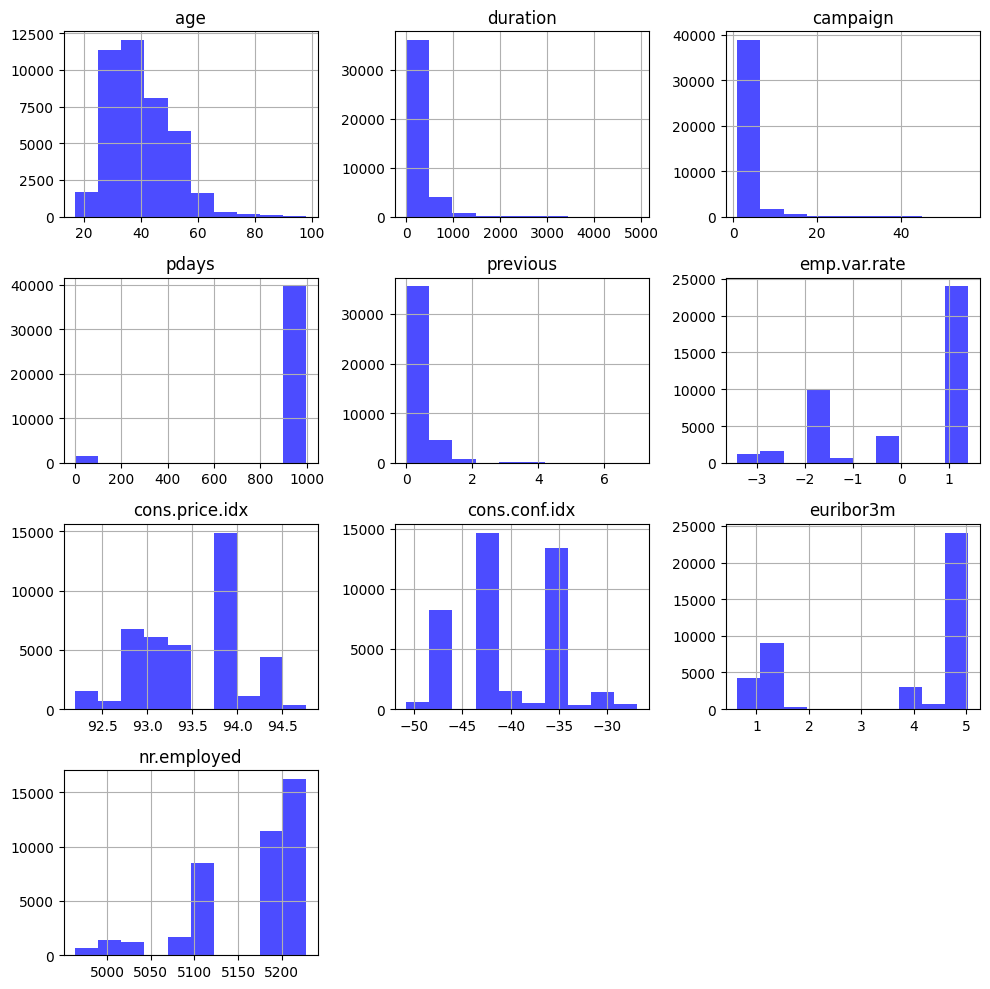

In [ ]:
# Plot the histogram with additional features
plt.figure(figsize=(10, 10))
data.hist(figsize=(10,10), color='blue', alpha=0.7)  # Set alpha to adjust transparency
plt.xlabel('Value', fontsize=12)  # Set x-axis label and font size
plt.ylabel('Frequency', fontsize=12)  # Set y-axis label and font size
plt.title('Histogram of Data', fontsize=14)  # Set plot title and font size
plt.grid(False)  # Turn off grid lines
plt.tight_layout()  # Adjust layout to prevent overlap of labels
plt.show()

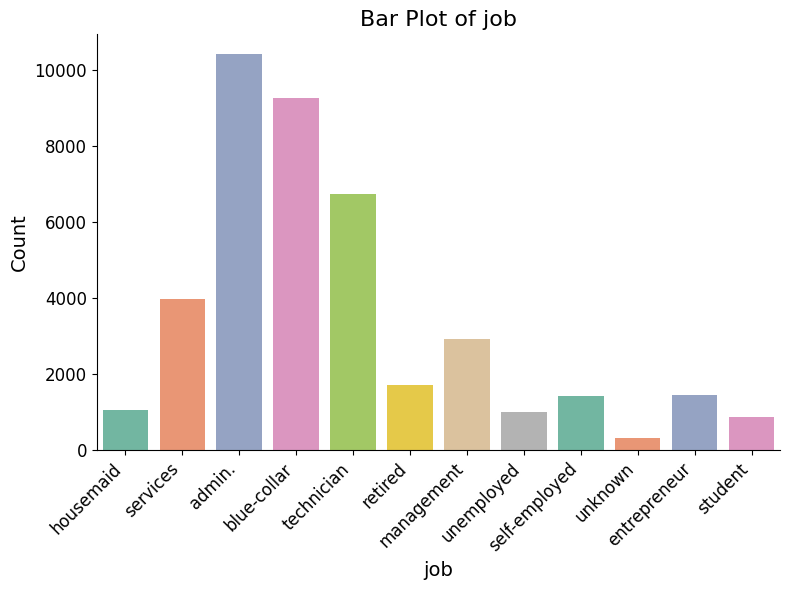

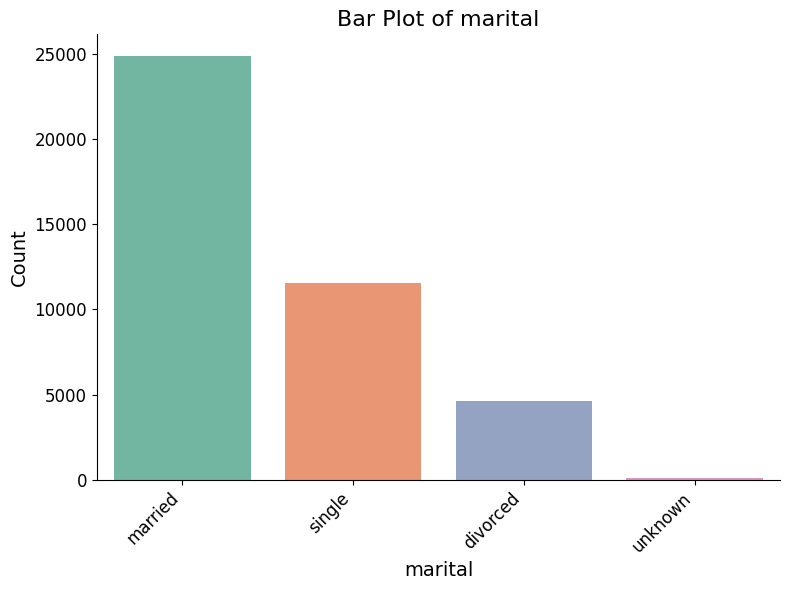

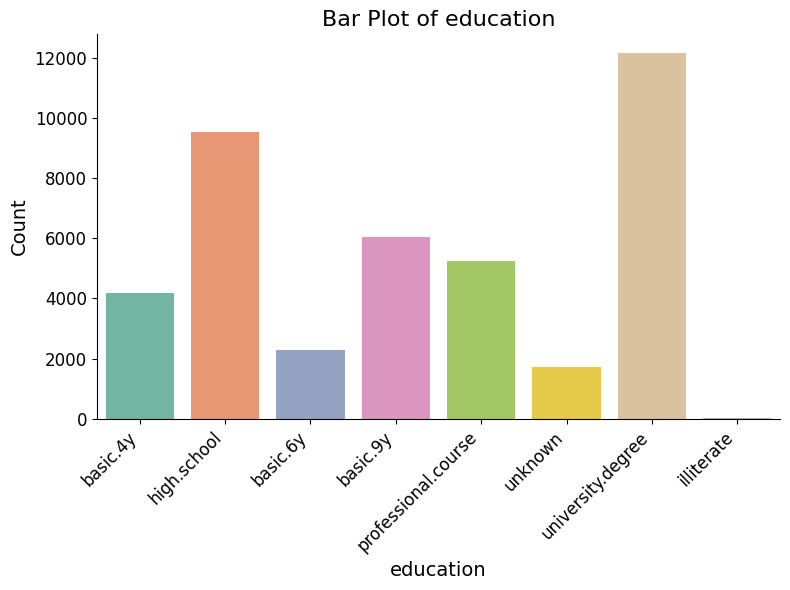

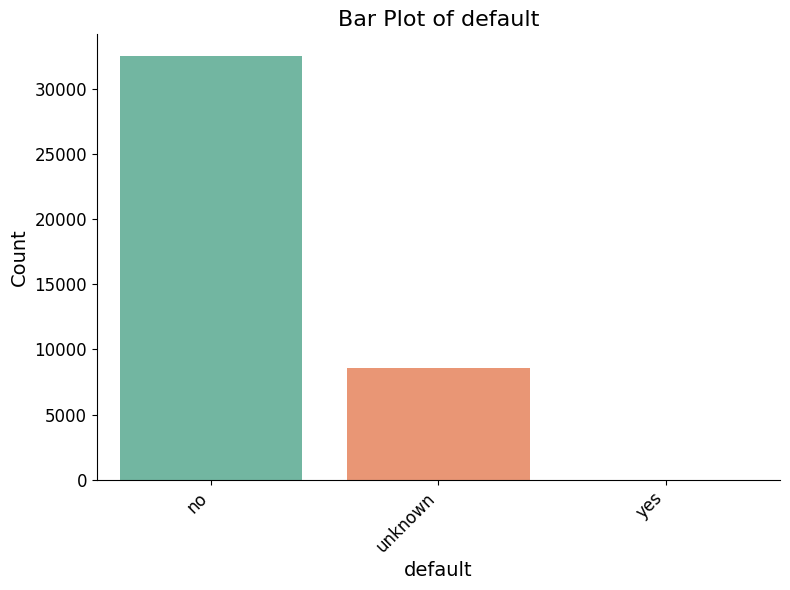

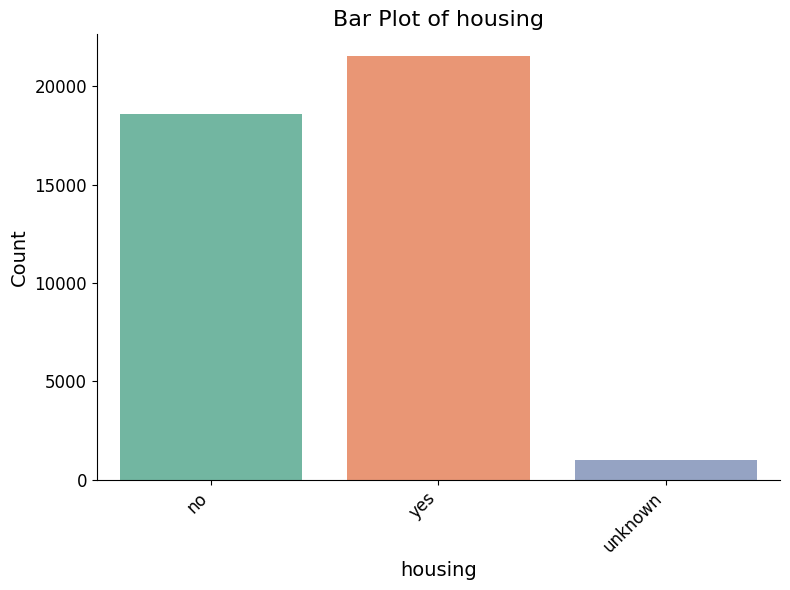

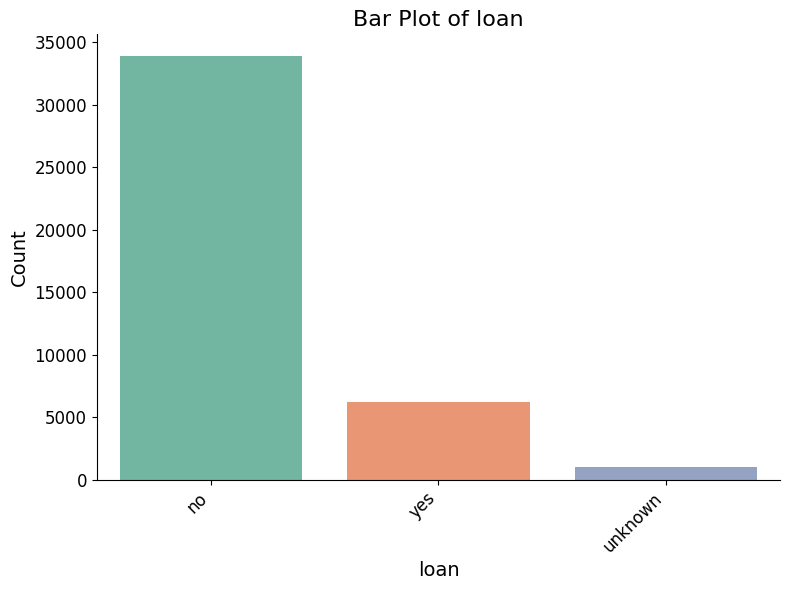

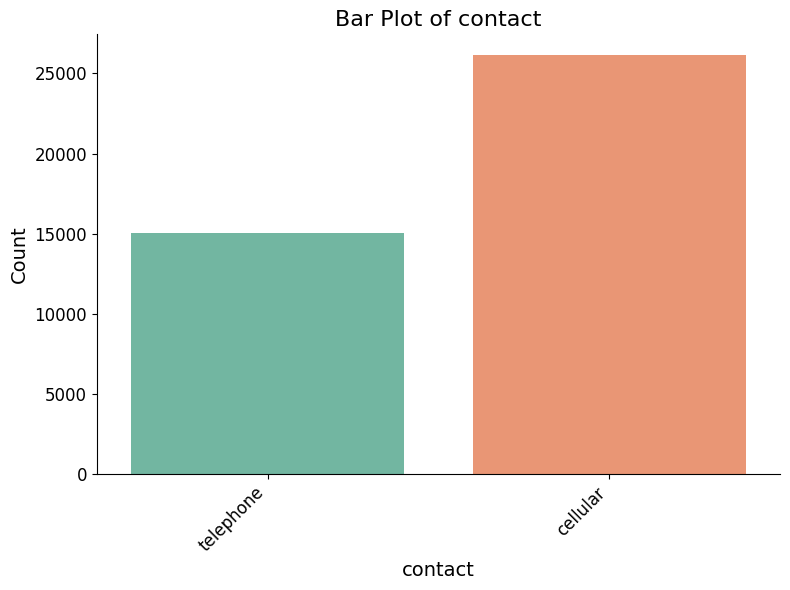

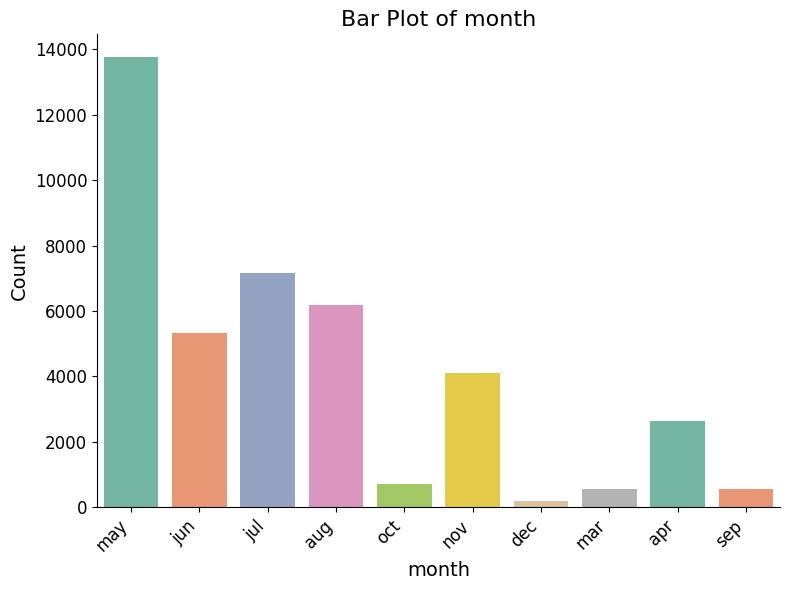

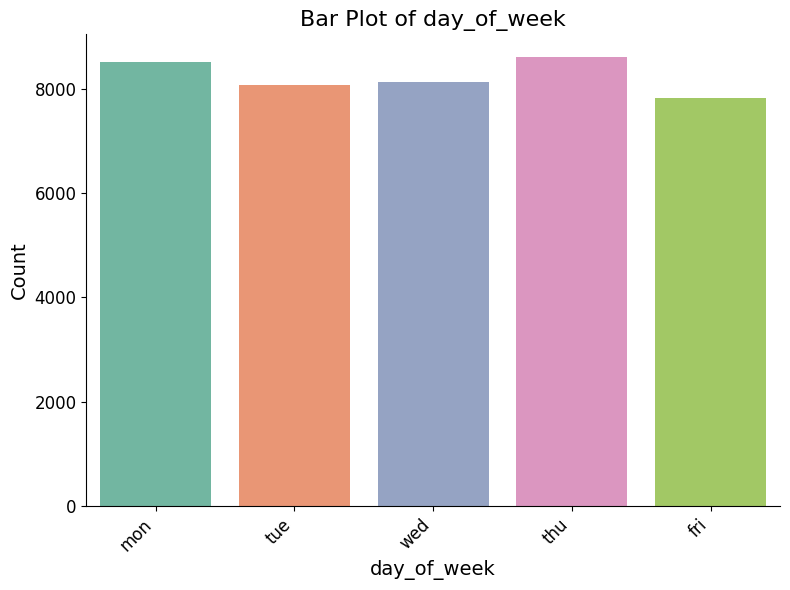

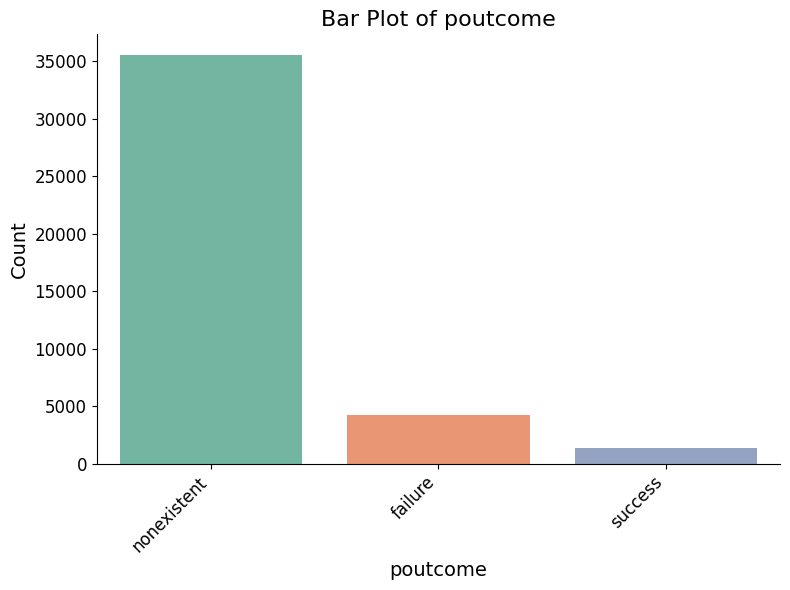

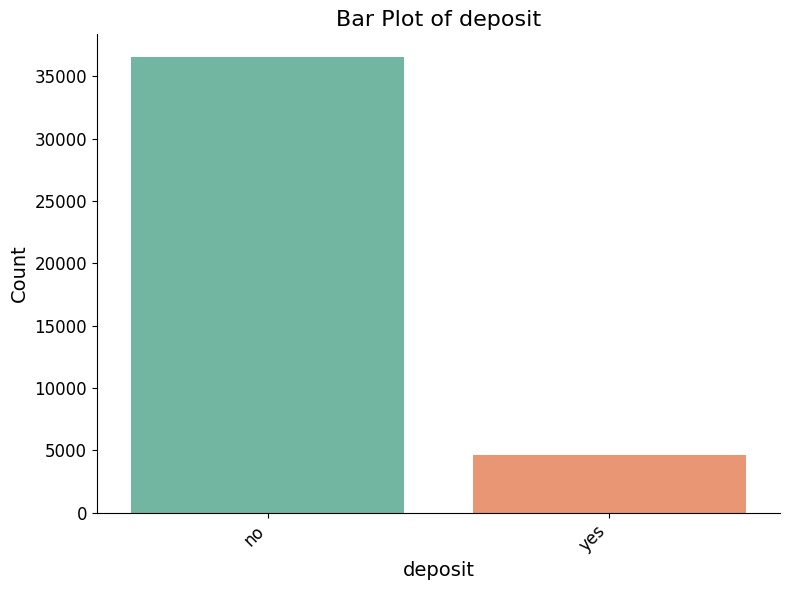

In [ ]:
for feature in cat_cols:
    plt.figure(figsize=(8, 6))  # Adjust the figure size for better visibility
    sns.countplot(x=feature, data=data, palette='Set2')
    plt.title(f'Bar Plot of {feature}', fontsize=16)  # Increase title font size
    plt.xlabel(feature, fontsize=14)  # Increase x-axis label font size
    plt.ylabel('Count', fontsize=14)  # Increase y-axis label font size
    plt.xticks(rotation=45, ha='right', fontsize=12)  # Rotate x-axis labels for better readability
    plt.yticks(fontsize=12)  # Increase y-axis tick font size
    sns.despine()  # Remove the top and right spines for cleaner appearance
    plt.tight_layout()  # Adjust layout to prevent clipping of labels
    plt.show()

<Figure size 2000x1000 with 0 Axes>

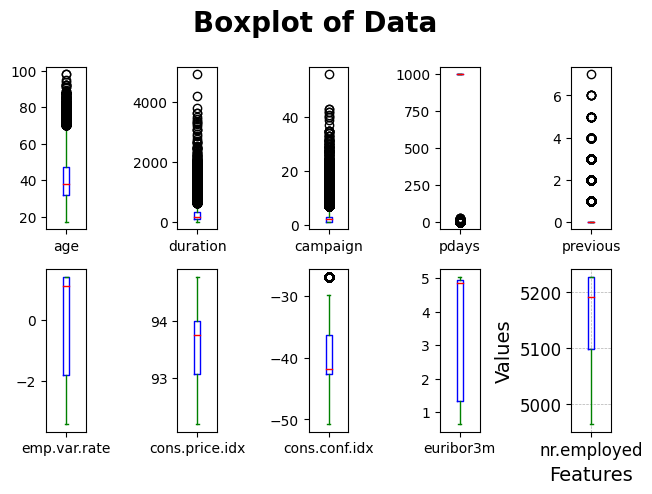

In [ ]:
plt.figure(figsize=(20, 10))
data.plot(kind='box', subplots=True, layout=(2, 5), color='green', boxprops=dict(color='blue'), medianprops=dict(color='red'))

# Customize plot properties
plt.suptitle('Boxplot of Data', fontsize=20, y=1.02, fontweight='bold')
plt.grid(True, linestyle='--', linewidth=0.5)
plt.xlabel('Features', fontsize=14)
plt.ylabel('Values', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.tight_layout()
plt.subplots_adjust(top=0.9)
plt.show()

In [ ]:
column=data[['age', 'campaign', 'duration']]
q1=np.quantile(column,0.25)
q3=np.quantile(column,0.75)
iqr=q3-q1
lower_bound=q1-(1.5*iqr)
upper_bound=q3-(1.5*iqr)
print(iqr,upper_bound,lower_bound)
data[['age','campaign','duration']]=column[(column>lower_bound)&(column<upper_bound)]

99.0 -46.5 -145.5


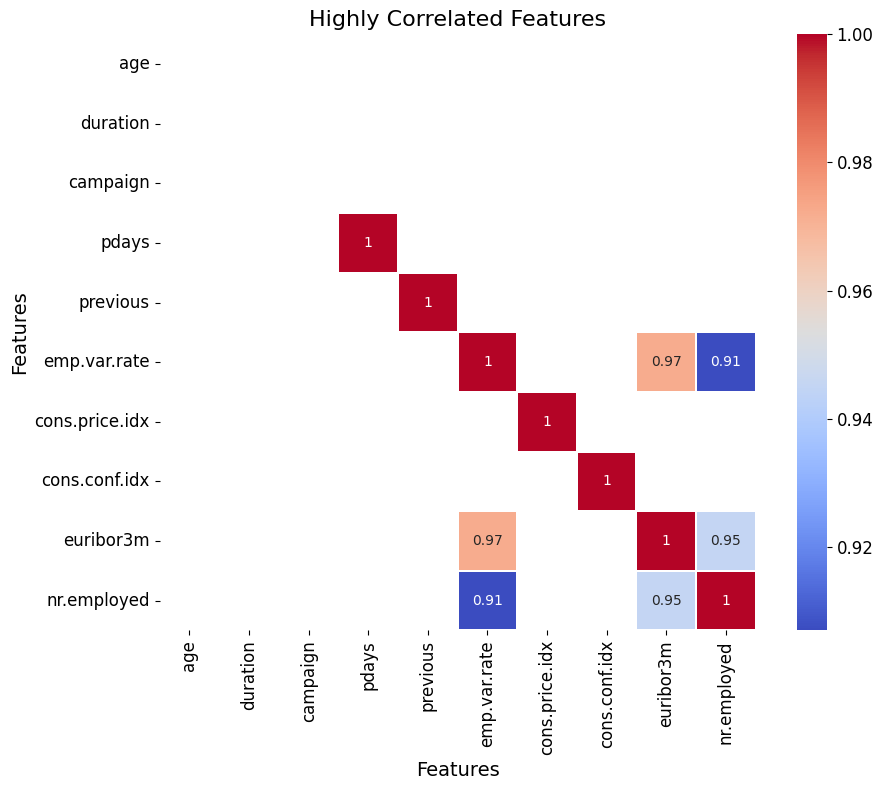

In [ ]:
# Calculate correlation matrix
corr = data.corr()

# Filter correlations with absolute value >= 0.90
high_correlation = corr[abs(corr) >= 0.90]

# Plot heatmap
plt.figure(figsize=(10, 8))
heatmap = sns.heatmap(high_correlation, annot=True, cmap='coolwarm', linewidths=0.2, square=True)

# Customize plot
plt.title('Highly Correlated Features', fontsize=16)
plt.xlabel('Features', fontsize=14)
plt.ylabel('Features', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Show colorbar
cbar = heatmap.collections[0].colorbar
cbar.ax.tick_params(labelsize=12)

# Show plot
plt.tight_layout()
plt.show()


In [ ]:
high_corr_cols=['emp.var.rate','euribor3m','nr.employed']

In [ ]:
df1=data.copy()
df1.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'deposit'],
      dtype='object')

In [ ]:
df1.drop(high_corr_cols,inplace=True,axis=1)

In [ ]:
from sklearn.preprocessing import LabelEncoder
lb=LabelEncoder()
df_encoded=df1.apply(lb.fit_transform)
df_encoded

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,cons.price.idx,cons.conf.idx,deposit
0,0,3,1,0,0,0,0,1,6,1,0,0,26,0,1,18,16,0
1,0,7,1,3,1,0,0,1,6,1,0,0,26,0,1,18,16,0
2,0,7,1,3,0,2,0,1,6,1,0,0,26,0,1,18,16,0
3,0,0,1,1,0,0,0,1,6,1,0,0,26,0,1,18,16,0
4,0,7,1,3,0,0,2,1,6,1,0,0,26,0,1,18,16,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,0,5,1,5,0,2,0,0,7,0,0,0,26,0,1,25,0,1
41184,0,1,1,5,0,0,0,0,7,0,0,0,26,0,1,25,0,0
41185,0,5,1,6,0,2,0,0,7,0,0,0,26,0,1,25,0,0
41186,0,9,1,5,0,0,0,0,7,0,0,0,26,0,1,25,0,1


In [ ]:
df_encoded['deposit'].value_counts()

0    36537
1     4639
Name: deposit, dtype: int64

In [ ]:
x=df_encoded.drop('deposit',axis=1)
y=df_encoded['deposit']
print(x.shape)
print(y.shape)
print(type(x))
print(type(y))

(41176, 17)
(41176,)
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>


**SPLITTING DATA INTO TEST AND TRAIN DATASET**

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
print(4119*0.25)

1029.75


In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=1)
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(30882, 17)
(30882,)
(10294, 17)
(10294,)


In [ ]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
def eval_model(y_test,y_pred):
  acc=accuracy_score(y_test,y_pred)
  print("\naccuracy score :",acc)
  cn=confusion_matrix(y_test,y_pred)
  print("\nconfusion matrix :",cn)
  print("\nclassification report\n",classification_report(y_test,y_pred))
def mscore(model):
    train_score=model.score(x_train,y_train)
    test_score=model.score(x_test,y_test)
    print("\ntraining score :",train_score)
    print("\ntesting score :",test_score)

**DECISION TREE CLASSIFIER**

In [ ]:
#decision tree classifier
from sklearn.tree import DecisionTreeClassifier

In [ ]:
dt=DecisionTreeClassifier(criterion='gini',max_depth=5,min_samples_split=10)
dt.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=5, min_samples_split=10)

In [ ]:
mscore(dt)


training score : 0.9020141182565896

testing score : 0.8996502817175054


In [ ]:
ypred_dt=dt.predict(x_test)
print(ypred_dt)

[1 0 0 ... 0 0 0]


In [ ]:
eval_model(y_test,ypred_dt)


accuracy score : 0.8996502817175054

confusion matrix : [[9006  127]
 [ 906  255]]

classification report
               precision    recall  f1-score   support

           0       0.91      0.99      0.95      9133
           1       0.67      0.22      0.33      1161

    accuracy                           0.90     10294
   macro avg       0.79      0.60      0.64     10294
weighted avg       0.88      0.90      0.88     10294



In [ ]:
from sklearn.tree import plot_tree
cn=['no','yes']
fn=x_train.columns
print(cn)
print(fn)

['no', 'yes']
Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'cons.price.idx', 'cons.conf.idx'],
      dtype='object')


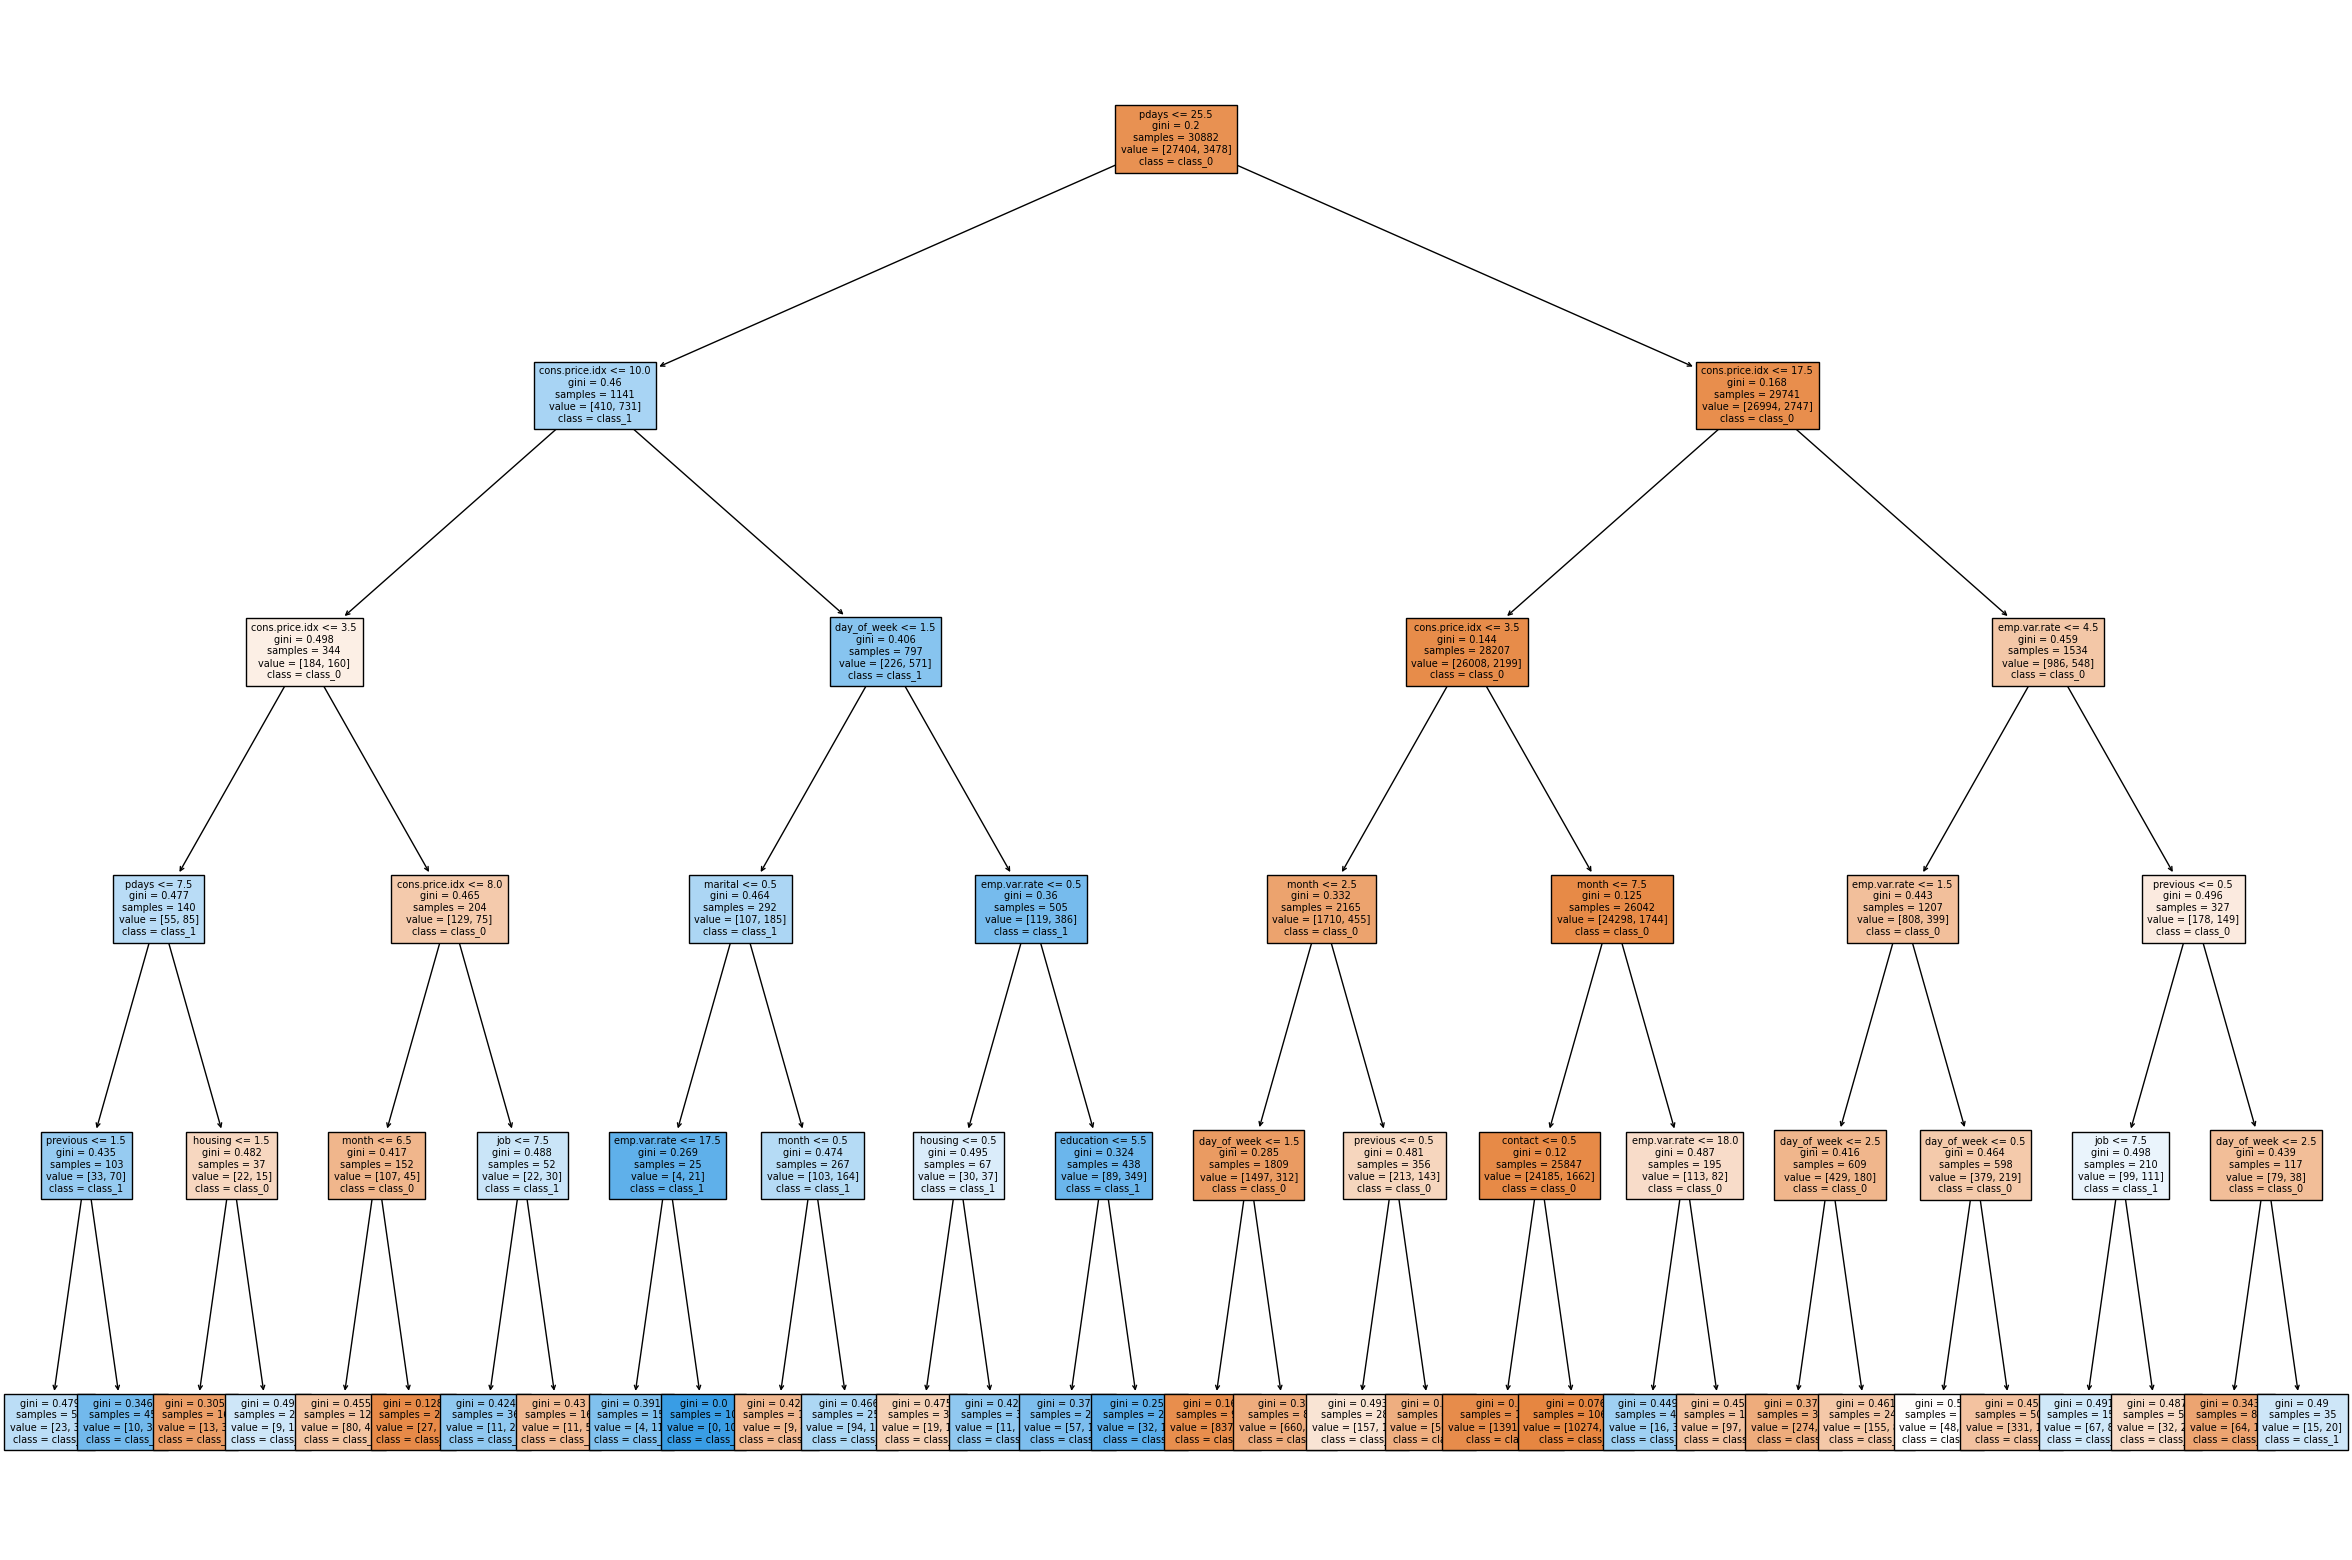

In [ ]:
feature_names=data.columns.tolist()
class_names=["class_0","class_1"]
plt.figure(figsize=(30,20))
plot_tree(dt,feature_names=feature_names,class_names=class_names,filled=True,fontsize=7)
plt.show()

In [ ]:
dt1=DecisionTreeClassifier(criterion='entropy',max_depth=4,min_samples_split=15)
dt1.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4, min_samples_split=15)

In [ ]:
mscore(dt1)


training score : 0.9001360015543035

testing score : 0.8994559937827861


In [ ]:
ypred_dt1=dt1.predict(x_test)
print(ypred_dt1)

[1 0 0 ... 0 0 0]


In [ ]:
eval_model(y_test,ypred_dt1)


accuracy score : 0.8994559937827861

confusion matrix : [[9014  119]
 [ 916  245]]

classification report
               precision    recall  f1-score   support

           0       0.91      0.99      0.95      9133
           1       0.67      0.21      0.32      1161

    accuracy                           0.90     10294
   macro avg       0.79      0.60      0.63     10294
weighted avg       0.88      0.90      0.88     10294



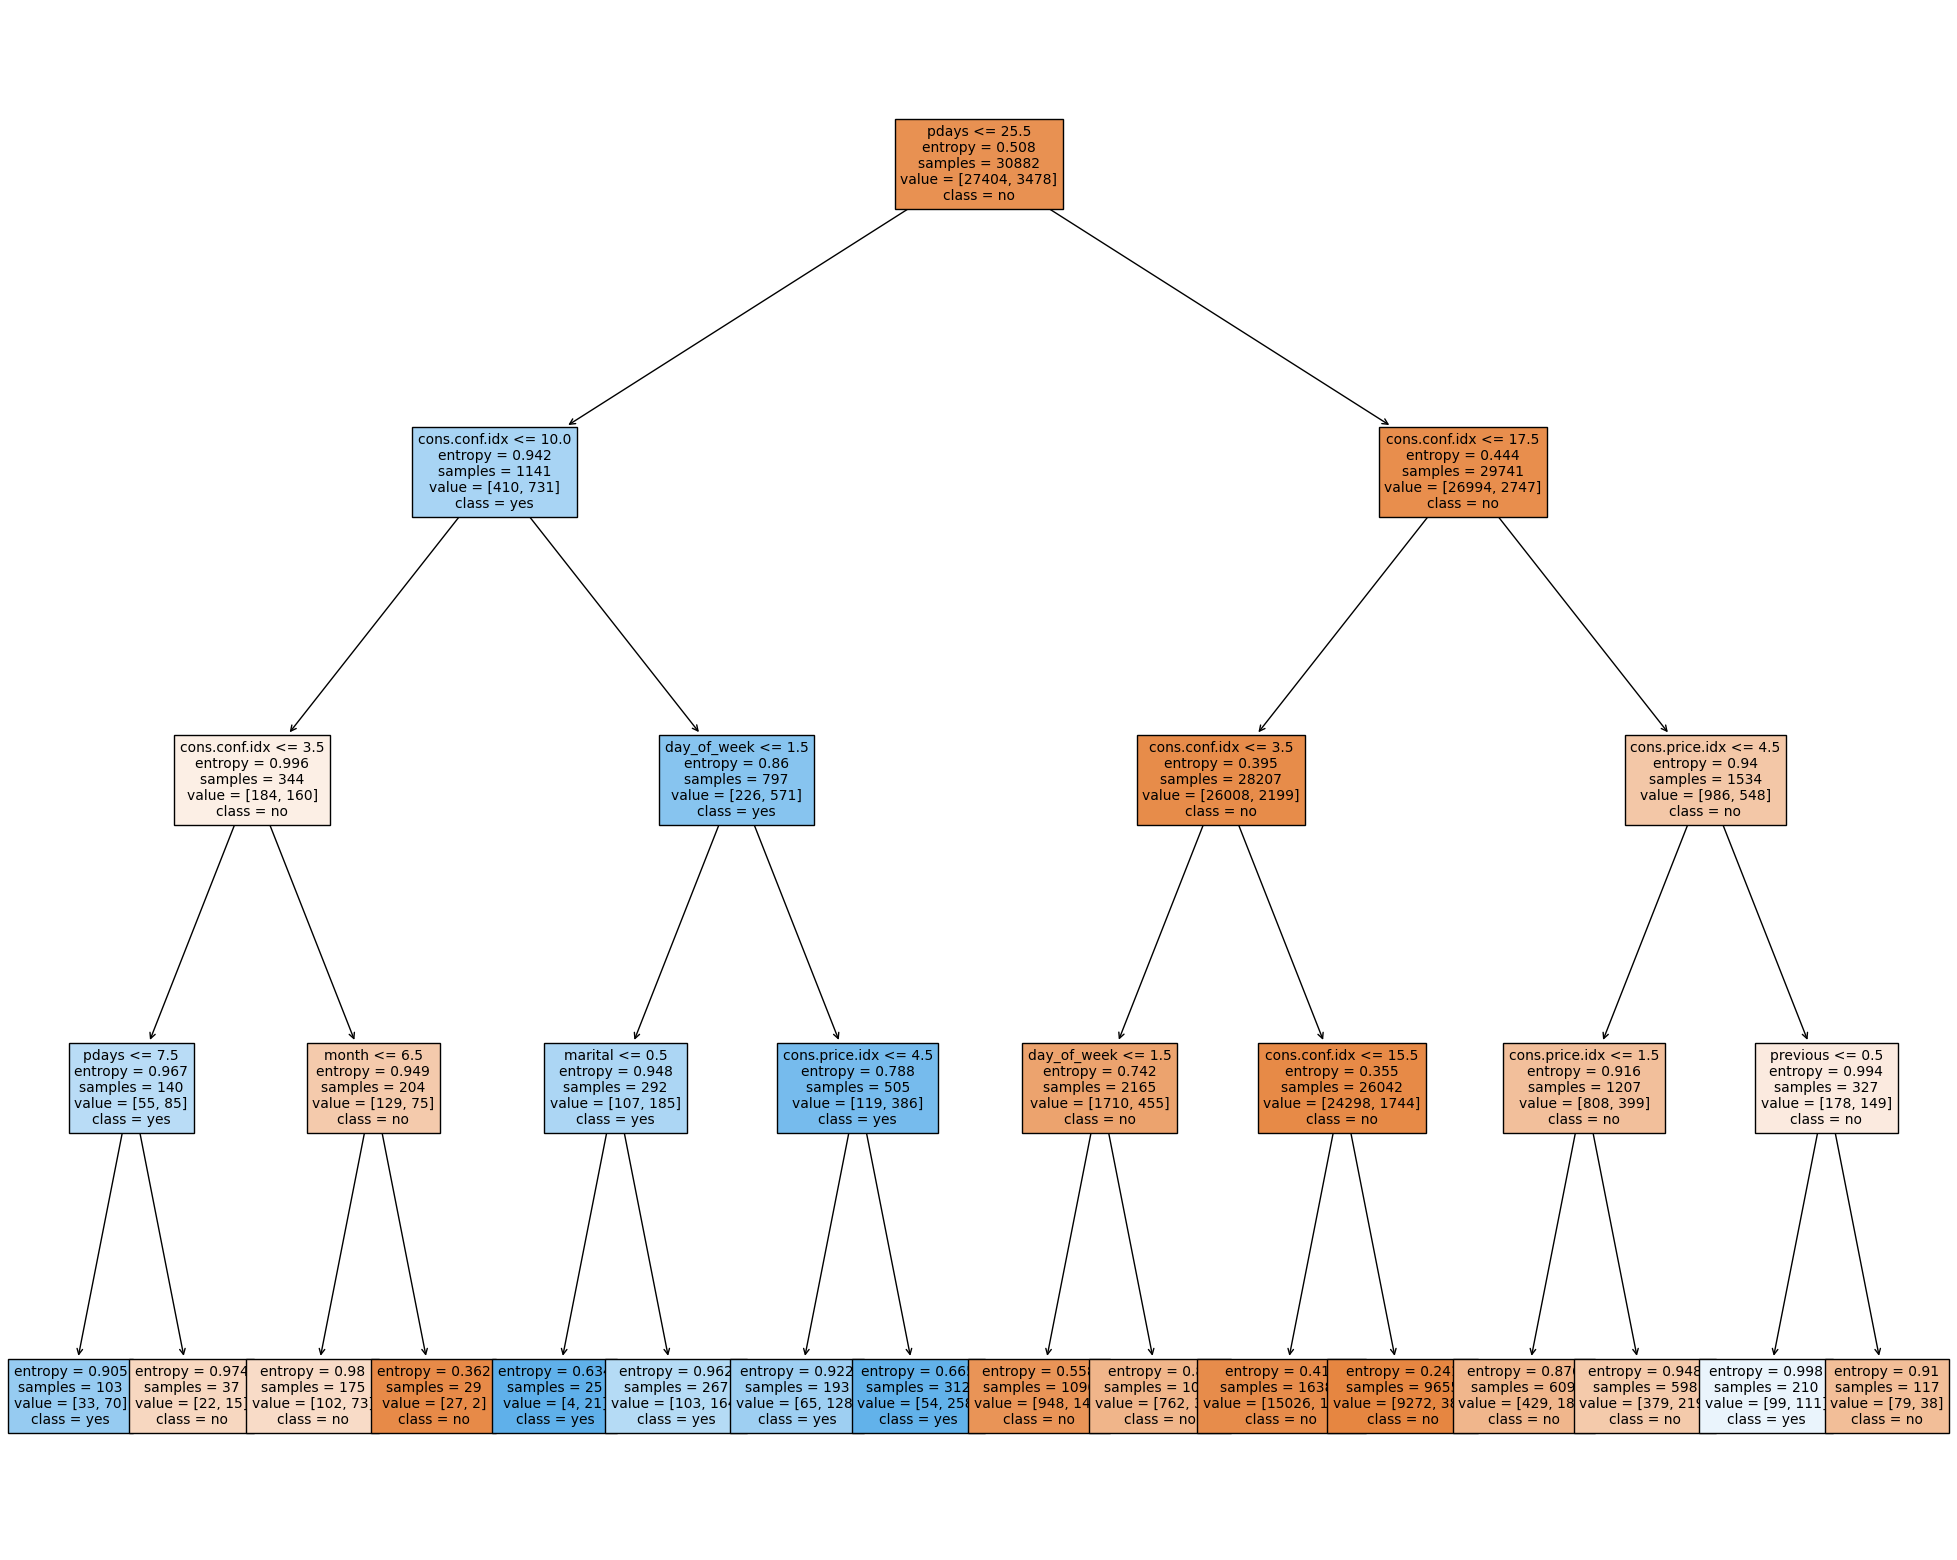

In [ ]:
plt.figure(figsize=(25,20))
plot_tree(dt1,feature_names=fn.tolist(),class_names=cn,filled=True,fontsize=10)
plt.show()